# New Notebook

Whats this notebook about?

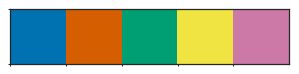

In [1]:
import sys
import os
from glob import glob
import re
from collections import OrderedDict

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from IPython.display import display

from upsetplot import plot as upsetplot, generate_data
from upsetplot.data import from_sets
from upsetplot.plotting import _process_data

## Default plotting params

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [2]:
all_genes = np.arange(10000)
genes_cond_a = np.random.choice(all_genes, size=400, replace=False)
prob = np.array([10 if x in genes_cond_a else 1 for x in all_genes])
prob = prob / prob.sum()
genes_cond_b = np.random.choice(all_genes, size=260, replace=False, p=prob)
genes_cond_c = np.random.choice(all_genes, size=230, replace=False)
experiment = from_sets(OrderedDict([
    ('Cond A', set(genes_cond_a)),
    ('Cond B', set(genes_cond_b)),
    ('Cond C', set(genes_cond_c))
]))
experiment

Cond A  Cond B  Cond C
True    True    True        0
                False      67
        False   True        8
                False     325
False   True    True        4
                False     189
        False   True      218
                False       0
dtype: int64

/home/matthew/Documents/UpSetPlot/upsetplot/plotting.py:30: PerformanceWarning: indexing past lexsort depth may impact performance.
  totals.append(data.loc[idxslice].sum())
/home/matthew/anaconda3/envs/ml_python35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


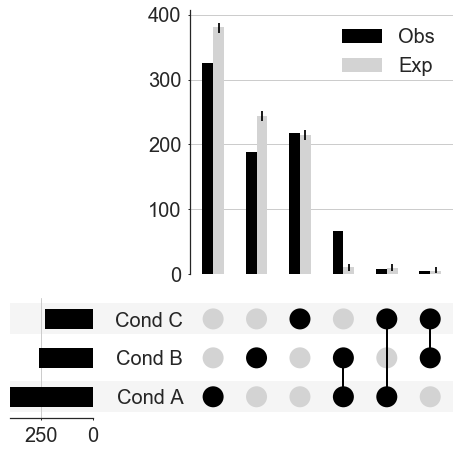

In [4]:
upsetplot(experiment,
          sort_by='degree',
          sort_sets_by=None,
          bootstrap_expected=True,
          global_set_size=len(all_genes),
          n_boot=1000, ci=95,
          orientation='horizontal',
          discard_empty=True,
          element_size=60)
plt.show()